In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/nikhilaji/Documents/Pandas_basics/Pandas/Data Jobs.csv')

In [3]:
# Data Cleaning

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

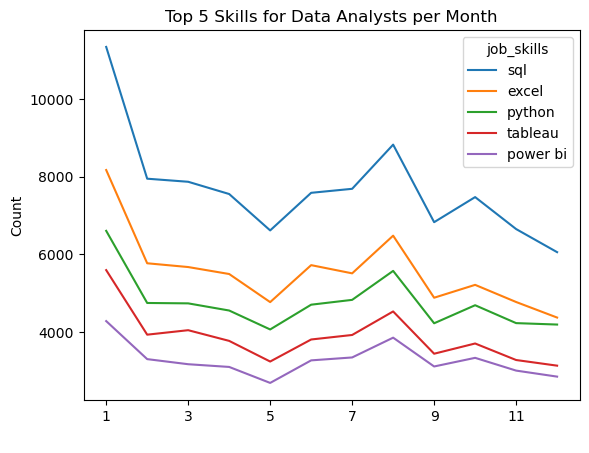

In [24]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()


df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot.iloc[:, :5].plot(kind="line") 
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel(' ')
plt.show()